# Top 10 Unemployment Countries

## 1. Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Call up dataset of age group 15 to 24
teilm021 = pd.read_csv('../data/pickles/teilm021.csv', 
                       index_col = 0)
teilm021.head()

,s_adj,age,sex,unit,geo,2019m09,2019m10,2019m11,2019m12,2020m01,2020m02,2020m03,2020m04,2020m05,2020m06,2020m07,2020m08
0,SA,Y_LT25,F,PC_ACT,AT,7.8,7.6,7.7,8.0,8.9,9.5,9.6,10.3,10.2,9.6,9.2,NaN
1,SA,Y_LT25,F,PC_ACT,BE,11.8,13.2,13.2,13.2,13.0,13.0,13.0,13.8,13.8,13.8,NaN,NaN
2,SA,Y_LT25,F,PC_ACT,BG,6.9,7.1,7.2,7.3,10.1,11.2,11.6,14.8,13.1,10.7,9.6,NaN
3,SA,Y_LT25,F,PC_ACT,CH,8.4,8.2,8.1,7.9,7.2,6.8,7.3,8.2,8.7,8.4,NaN,NaN
4,SA,Y_LT25,F,PC_ACT,CY,13.8,14.2,14.2,14.2,11.1,11.1,11.1,18.4,18.4,18.4,NaN,NaN


In [3]:
# Call up dataset of age group 25 to 74
teilm022 = pd.read_csv('../data/pickles/teilm022.csv', 
                       index_col = 0)
teilm022.head()

,s_adj,age,sex,unit,geo,2019m09,2019m10,2019m11,2019m12,2020m01,2020m02,2020m03,2020m04,2020m05,2020m06,2020m07,2020m08
0,SA,Y25-74,F,PC_ACT,AT,3.7,3.8,3.7,3.7,3.7,3.6,3.7,4.0,4.2,4.1,3.9,NaN
1,SA,Y25-74,F,PC_ACT,BE,4.3,4.1,3.9,3.9,4.1,4.2,4.4,4.5,4.4,4.4,4.4,NaN
2,SA,Y25-74,F,PC_ACT,BG,3.5,3.6,3.6,3.5,3.8,3.6,3.6,4.2,4.0,3.9,3.9,NaN
3,SA,Y25-74,F,PC_ACT,CH,4.0,3.8,3.6,3.7,4.0,4.1,4.1,4.0,4.1,4.2,NaN,NaN
4,SA,Y25-74,F,PC_ACT,CY,7.0,6.8,6.6,6.3,6.0,5.6,5.9,7.3,7.3,6.1,5.3,NaN


## 2. Data Wrangling

### 2.1 Join Datasets

In [4]:
# Concatenating datasets of two age groups
teilm021_022_concat = pd.concat([teilm021, teilm022], 
                                axis = 0)
teilm021_022_concat.head()

,s_adj,age,sex,unit,geo,2019m09,2019m10,2019m11,2019m12,2020m01,2020m02,2020m03,2020m04,2020m05,2020m06,2020m07,2020m08
0,SA,Y_LT25,F,PC_ACT,AT,7.8,7.6,7.7,8.0,8.9,9.5,9.6,10.3,10.2,9.6,9.2,NaN
1,SA,Y_LT25,F,PC_ACT,BE,11.8,13.2,13.2,13.2,13.0,13.0,13.0,13.8,13.8,13.8,NaN,NaN
2,SA,Y_LT25,F,PC_ACT,BG,6.9,7.1,7.2,7.3,10.1,11.2,11.6,14.8,13.1,10.7,9.6,NaN
3,SA,Y_LT25,F,PC_ACT,CH,8.4,8.2,8.1,7.9,7.2,6.8,7.3,8.2,8.7,8.4,NaN,NaN
4,SA,Y_LT25,F,PC_ACT,CY,13.8,14.2,14.2,14.2,11.1,11.1,11.1,18.4,18.4,18.4,NaN,NaN


The success of the concatenation is **checked**.

In [5]:
# Check column names
teilm021_022_concat.columns

Index(['s_adj', 'age', 'sex', 'unit', 'geo', '2019m09', '2019m10', '2019m11',
       '2019m12', '2020m01', '2020m02', '2020m03', '2020m04', '2020m05',
       '2020m06', '2020m07', '2020m08'],
      dtype='object')

In [6]:
# Check no. of rows and columns
teilm021.shape

(116, 17)

In [7]:
# Check no. of rows and columns
teilm022.shape

(115, 17)

In [8]:
# Check no. of rows and columns
teilm021_022_concat.shape

(231, 17)

In [9]:
cols = ['2019m09', '2019m10', '2019m11', '2019m12', 
        '2020m01', '2020m02', '2020m03', '2020m04', 
        '2020m05', '2020m06', '2020m07', '2020m08']
teilm021_022_concat['mean'] = (teilm021_022_concat[cols]
                               .mean(axis=1))

In [10]:
(teilm021_022_concat['mean']
 .value_counts()
 .sort_values(ascending = False))

6.663636     3
6.281818     3
5.720000     2
5.120000     2
7.063636     2
            ..
4.236364     1
2.663636     1
4.154545     1
34.930000    1
4.600000     1
Name: mean, Length: 218, dtype: int64

### 2.2 Save New CSV

In [11]:
teilm021_022_concat.to_csv('../data/output/teilm021_022_concat.csv')

## 3. Data Analysis

### 3.1 Find top 10 Countries

In [12]:
# Subsetting joined data
teilm021_022_concat_2 = teilm021_022_concat[['age', 'sex', 
                                             'geo', 'mean']]
teilm021_022_concat_2.head()

,age,sex,geo,mean
0,Y_LT25,F,AT,8.945455
1,Y_LT25,F,BE,13.180000
2,Y_LT25,F,BG,9.963636
3,Y_LT25,F,CH,7.920000
4,Y_LT25,F,CY,14.490000


In [13]:
# Select the total sex
teilm021_022_concat_3 = teilm021_022_concat_2[teilm021_022_concat_2['sex'] == 'T']
teilm021_022_concat_3.head()

,age,sex,geo,mean
76,Y_LT25,T,AT,10.145455
77,Y_LT25,T,BE,13.300000
78,Y_LT25,T,BG,10.818182
79,Y_LT25,T,CH,8.500000
80,Y_LT25,T,CY,16.160000


In [14]:
# Ignore age and sex
teilm021_022_concat_4 = teilm021_022_concat_3[['geo', 'mean']]
teilm021_022_concat_4.head()

,geo,mean
76,AT,10.145455
77,BE,13.300000
78,BG,10.818182
79,CH,8.500000
80,CY,16.160000


In [15]:
teilm021_022_concat_5 = (teilm021_022_concat_4
                         .rename(columns = {'mean': 'unemployment'})
                         .reset_index(drop = True)
teilm021_022_concat_5.head())

,geo,unemployment
0,AT,10.145455
1,BE,13.300000
2,BG,10.818182
3,CH,8.500000
4,CY,16.160000


In [16]:
# Group by country
country_index = (teilm021_022_concat_5
                 .groupby('geo')
                 .mean())
(country_index
 .sort_values('unemployment', ascending = False)
 .reset_index()
 .round())

,geo,unemployment
0,EL,25.0
1,ES,24.0
2,IT,18.0
3,TR,18.0
4,SE,14.0
5,LU,13.0
6,FR,13.0
7,PT,13.0
8,HR,12.0
9,FI,12.0


In [17]:
# Top 10 countries
country_index2 = country_index.nlargest(10, 'unemployment').round().reset_index()
country_index2

,geo,unemployment
0,EL,25.0
1,ES,24.0
2,IT,18.0
3,TR,18.0
4,SE,14.0
5,LU,13.0
6,FR,13.0
7,PT,13.0
8,HR,12.0
9,FI,12.0


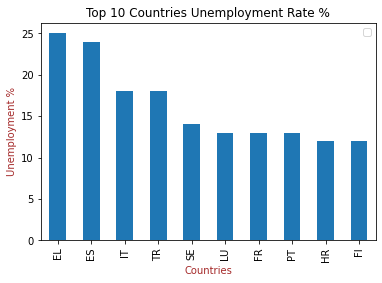

In [18]:
# Visualize findings
country_index2.plot (x = 'geo', y = 'unemployment', kind = 'bar')
plt.xlabel('Countries', color = 'brown')
plt.ylabel('Unemployment %', color = 'brown')
plt.title('Top 10 Countries Unemployment Rate %')
plt.legend('')
plt.show();

### 3.2 Save New CSV 

Earlier file version with **all countries** is saved for further processing in Tableau.

In [19]:
# Earlier version with all countries 
country_index.to_csv('../data/output/country_index.csv')